# Project 1


In [2]:
from datascience import *
import datascience as ds
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn
from datetime import datetime
seaborn.set_context(rc={'lines.markeredgewidth': 1.0})
%matplotlib inline

In [35]:
#filtered data
sf_taxi=Table.read_table("SF_taxi_data.csv")
sf_taxi=sf_taxi.where("num",1).sort("fare ($)").exclude[:156]
sf_taxi

id,departure time,arrival time,fare ($),num,dep lon,dep lat,arr lon,arr lat,deptaz,arrtaz,dist (miles)
3969,9/1/12 21:16,9/1/12 21:18,3.5,1,-122.405,37.7967,-122.409,37.7998,24,37,0.481116
5337,9/2/12 4:35,9/2/12 4:45,3.5,1,-122.418,37.7854,-122.438,37.7997,30,50,2.1023
23876,9/8/12 1:20,9/8/12 1:31,3.5,1,-122.44,37.8004,-122.46,37.7856,50,66,1.94242
44278,9/11/12 12:25,9/11/12 12:48,3.5,1,-122.385,37.6173,-122.421,37.7905,239,32,14.1204
232,9/1/12 0:04,9/1/12 0:06,4.05,1,-122.459,37.7837,-122.456,37.786,70,70,0
693,9/1/12 1:14,9/1/12 1:16,4.05,1,-122.424,37.7767,-122.423,37.7752,79,79,0
1126,9/1/12 7:20,9/1/12 7:22,4.05,1,-122.418,37.7856,-122.416,37.7884,0,31,0.184055
2932,9/1/12 21:36,9/1/12 21:38,4.05,1,-122.407,37.7849,-122.409,37.7855,5,7,0.386467
4289,9/1/12 19:20,9/1/12 19:22,4.05,1,-122.435,37.7715,-122.438,37.7751,84,85,0.291265
4651,9/1/12 20:19,9/1/12 20:21,4.05,1,-122.422,37.7648,-122.421,37.76,105,0,0.589304


### Analysis 1

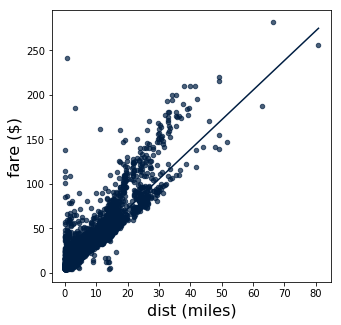

In [36]:
sf_taxi.select("fare ($)", "dist (miles)").scatter("dist (miles)", fit_line=True)

In [37]:
x=sf_taxi.column("dist (miles)")
y=sf_taxi.column("fare ($)")
theta1 = np.sum(x*(y-np.mean(y)))/np.sum(x*(x-np.mean(x)))
theta2 = -theta1*np.mean(x) + np.mean(y)
theta1, theta2

(3.3335992987211664, 5.0862618351484841)

In [38]:
#base fare relationship is given by equation in analysis 1
#actual fare relationship is of distance and the fare data given above
dist=sf_taxi.column("dist (miles)")
actual_fare_relationship=3.33*dist+5.09
base_fare_relationship=2.75*dist+2.95
t=Table().with_column("distance",dist,"fare ($)",sf_taxi.column("fare ($)"),"actual fare",actual_fare_relationship,"base fare",base_fare_relationship)
t

distance,fare ($),actual fare,base fare
0.481116,3.5,6.69212,4.27307
2.1023,3.5,12.0907,8.73134
1.94242,3.5,11.5583,8.29165
14.1204,3.5,52.1111,41.7812
0,4.05,5.09,2.95
0,4.05,5.09,2.95
0.184055,4.05,5.7029,3.45615
0.386467,4.05,6.37693,4.01278
0.291265,4.05,6.05991,3.75098
0.589304,4.05,7.05238,4.57059


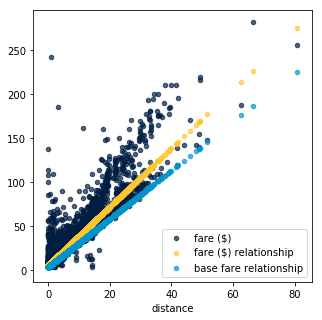

In [39]:
#yellow line is linear regression line of fares
#shows that base fare equation is more a minimum than an accurate estimate of the total fare
t.scatter("distance")
plt.legend(["fare ($)", "fare ($) relationship", "base fare relationship"])

### Analysis 2

In [40]:
sfo_taz=sf_taxi.group("deptaz").sort("count",descending=True).take(0).column(0).item(0)
taxi_sfo = sf_taxi.where("arrtaz", are.equal_to(sfo_taz)).append(sf_taxi.where("deptaz", are.equal_to(sfo_taz)))
#.where("deptaz", are.equal_to(sfo_taz))
taxi_non_sfo = sf_taxi.where("arrtaz", are.not_equal_to(sfo_taz)).where("deptaz", are.not_equal_to(sfo_taz))


In [41]:
taxi_sfo.show(20)

id,departure time,arrival time,fare ($),num,dep lon,dep lat,arr lon,arr lat,deptaz,arrtaz,dist (miles)
27215,9/10/12 7:48,9/10/12 7:50,4.05,1,-122.385,37.6177,-122.401,37.6245,239,239,0
13611,9/4/12 22:27,9/4/12 22:30,6.8,1,-122.39,37.6152,-122.387,37.6177,239,239,0
49227,9/14/12 7:49,9/14/12 7:54,6.8,1,-122.387,37.6176,-122.385,37.6175,239,239,0
46721,9/13/12 9:34,9/13/12 9:37,8.25,1,-122.387,37.6179,-122.39,37.6152,239,239,0
11566,9/3/12 13:45,9/3/12 13:49,10.65,1,-122.404,37.635,-122.388,37.6176,238,239,2.04926
37245,9/11/12 5:49,9/11/12 6:04,11.75,1,-122.405,37.7854,-122.386,37.6147,12,239,13.8379
22465,9/8/12 13:15,9/8/12 13:25,12.1,1,-122.384,37.6171,-122.387,37.6174,239,239,0
30486,9/7/12 22:42,9/7/12 22:47,12.1,1,-122.387,37.6177,-122.401,37.6344,239,239,0
42339,9/10/12 10:05,9/10/12 10:11,13.95,1,-122.418,37.6318,-122.384,37.6167,237,239,2.43343
48864,9/16/12 18:39,9/16/12 18:46,14.3,1,-122.385,37.6152,-122.401,37.6272,239,239,0


In [42]:
#avg of fares
np.mean(taxi_sfo.column("fare ($)"))

49.202554985943436

In [43]:
#avg distance involving sfo
np.mean(taxi_sfo.column("dist (miles)"))

13.594545076260808

In [44]:
#max distance
max(taxi_sfo.column("dist (miles)"))

80.845294134315594

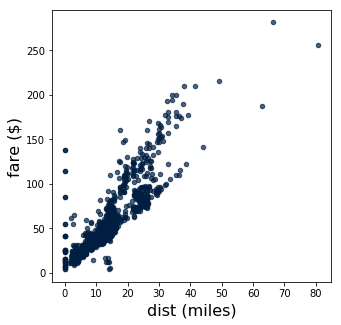

In [45]:
taxi_sfo.select("fare ($)","dist (miles)").scatter("dist (miles)")

In [46]:
taxi_non_sfo

id,departure time,arrival time,fare ($),num,dep lon,dep lat,arr lon,arr lat,deptaz,arrtaz,dist (miles)
3969,9/1/12 21:16,9/1/12 21:18,3.5,1,-122.405,37.7967,-122.409,37.7998,24,37,0.481116
5337,9/2/12 4:35,9/2/12 4:45,3.5,1,-122.418,37.7854,-122.438,37.7997,30,50,2.1023
23876,9/8/12 1:20,9/8/12 1:31,3.5,1,-122.44,37.8004,-122.46,37.7856,50,66,1.94242
232,9/1/12 0:04,9/1/12 0:06,4.05,1,-122.459,37.7837,-122.456,37.786,70,70,0
693,9/1/12 1:14,9/1/12 1:16,4.05,1,-122.424,37.7767,-122.423,37.7752,79,79,0
1126,9/1/12 7:20,9/1/12 7:22,4.05,1,-122.418,37.7856,-122.416,37.7884,0,31,0.184055
2932,9/1/12 21:36,9/1/12 21:38,4.05,1,-122.407,37.7849,-122.409,37.7855,5,7,0.386467
4289,9/1/12 19:20,9/1/12 19:22,4.05,1,-122.435,37.7715,-122.438,37.7751,84,85,0.291265
4651,9/1/12 20:19,9/1/12 20:21,4.05,1,-122.422,37.7648,-122.421,37.76,105,0,0.589304
4988,9/2/12 0:53,9/2/12 0:55,4.05,1,-122.419,37.7526,-122.421,37.7521,100,100,0


In [47]:
#avg fare
np.mean(taxi_non_sfo.column("fare ($)"))

12.420279346210995

In [48]:
#avg distance
np.mean(taxi_non_sfo.column("dist (miles)"))

2.1417872291614484

In [49]:
#max distance
max(taxi_non_sfo.column("dist (miles)"))

51.650002908779143

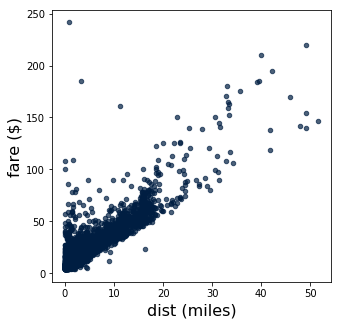

In [50]:
taxi_non_sfo.select("fare ($)", "dist (miles)").scatter("dist (miles)")

### Analysis 3

In [51]:
#m=sf_taxi.column("dist (miles)")
#actual_fare=sf_taxi.column("fare ($)")
#f=3.5+0.55*(5*m-1)
#f-actual_fare

In [52]:
import datetime
 
def get_hour(s): 
    return datetime.datetime.strptime(s, "%m/%d/%y %H:%M").hour
 
def get_date(s): 
    return datetime.datetime.strptime(s, "%m/%d/%y %H:%M").date()
 
def get_weekday(s): # 0 = Monday - 6= Sunday
    return datetime.datetime.strptime(s, "%m/%d/%y %H:%M").date().weekday()
 
def get_dur(start,finish): 
    start_time = datetime.datetime.strptime(start, "%m/%d/%y %H:%M")
    end_time = datetime.datetime.strptime(finish, "%m/%d/%y %H:%M")
    return (end_time-start_time).seconds/60.

In [53]:
#base fare=2.75x + 2.95
#actual fare estimate=3.33x + 5.09 (from analysis 1)
dates=sf_taxi.select("departure time").apply(lambda x: get_date(x[0]))
training=sf_taxi.with_column("dates", dates).where("dates", are.between(datetime.date(2012, 9, 1), datetime.date(2012, 9, 11)))
testing=sf_taxi.with_column("dates", dates).where("dates", are.between(datetime.date(2012, 9, 11), datetime.date(2012, 9, 18)))

training_distance = training.column("dist (miles)")
fare_train = training.column("fare ($)")
base_fare_train = (2.75 * training_distance) + 2.95
extra_fare_train = fare_train - base_fare_train
extra = training.select("dist (miles)", "fare ($)").with_column("base fare ($)", base_fare_train, "extra fare ($)", extra_fare_train)
extra


d=training_distance
e=extra_fare_train
theta1 = np.sum(d*(e-np.mean(e)))/np.sum(d*(d-np.mean(d)))
theta2 = -theta1 * np.mean(d) + np.mean(e)
theta1, theta2
# Relationship between extra fare and distance=0.563x + 2.150

testing_distance = testing.column("dist (miles)")
fare_test = testing.column("fare ($)")
base_fare_test = (2.75 * testing_distance) + 2.95
extra_fare_test = fare_test - base_fare_test
extra2 = testing.select("dist (miles)", "fare ($)").with_column("base fare ($)", base_fare_test, "extra fare ($)", extra_fare_test)
extra2
extra_fare_pred = theta1 * testing_distance + theta2
extra_fare_pred
extra2_with_pred=extra2.with_column("extra fare predictions", extra_fare_pred)
extra2_with_pred

dist (miles),fare ($),base fare ($),extra fare ($),extra fare predictions
14.1204,3.5,41.7812,-38.2812,10.0956
0.688177,4.05,4.84249,-0.792487,2.53701
0.33726,4.05,3.87747,0.172534,2.33954
0.693927,4.05,4.8583,-0.808299,2.54024
0,4.05,2.95,1.1,2.14975
0.447954,4.05,4.18187,-0.131874,2.40183
0.2672,4.05,3.6848,0.3652,2.30011
0,4.05,2.95,1.1,2.14975
0,4.05,2.95,1.1,2.14975
0.193274,4.05,3.4815,0.568495,2.25851


In [54]:
#least squared error
LSE = (1/extra2.num_rows)*(np.sum((extra2_with_pred.column("extra fare ($)")-extra2_with_pred.column("extra fare predictions"))**2))
LSE


26.690733155169937

### Analysis 4

In [55]:
dates=sf_taxi.select("departure time").apply(lambda x: get_date(x[0]))
training=sf_taxi.with_column("dates", dates).where("dates", are.between(datetime.date(2012, 9, 1), datetime.date(2012, 9, 11)))
testing=sf_taxi.with_column("dates", dates).where("dates", are.between(datetime.date(2012, 9, 11), datetime.date(2012, 9, 18)))
train_pandas = training.to_df()
test_pandas = testing.to_df()
#print(train_pandas)
train_pandas['duration'] = train_pandas.apply(lambda row: get_dur(row['departure time'], row['arrival time']), axis=1)

test_pandas['duration'] = test_pandas.apply(lambda row: get_dur(row['departure time'], row['arrival time']), axis=1)
#print(test_pandas)

train = Table.from_df(train_pandas)
test = Table.from_df(test_pandas)


training_distance = train.column("dist (miles)")
fare_train = train.column("fare ($)")
base_fare_train = (2.75 * training_distance) + 2.95
extra_fare_train = fare_train - base_fare_train
extra = train.select("dist (miles)", "fare ($)", "duration").with_column("base fare ($)", base_fare_train, "extra fare ($)", extra_fare_train)
extra
#print(tax)
model = linear_model.LinearRegression()
model.fit(extra['duration'].reshape(-1, 1), extra['extra fare ($)'])

ypredicted = model.predict(test['duration'].reshape(-1,1))
test['extra fare duration'] = ypredicted
#print(extra)

d=training_distance
e=extra_fare_train
theta1 = np.sum(d*(e-np.mean(e)))/np.sum(d*(d-np.mean(d)))
theta2 = -theta1 * np.mean(d) + np.mean(e)
theta1, theta2

testing_distance = test["dist (miles)"]
fare_test = test["fare ($)"]
base_fare_test = (2.75 * testing_distance) + 2.95
extra_fare_test = fare_test - base_fare_test
extra2 = test.select("dist (miles)", "fare ($)", "duration", "extra fare duration").with_column("base fare ($)", base_fare_test, "extra fare ($)", extra_fare_test)

extra2
extra_fare_predictions = theta1 * testing_distance + theta2
extra_fare_predictions
extra2 = extra2.with_column("extra fare predictions", extra_fare_predictions)
extra2

dist (miles),fare ($),duration,extra fare duration,base fare ($),extra fare ($),extra fare predictions
14.1204,3.5,23,10.0003,41.7812,-38.2812,10.0956
0.688177,4.05,2,-0.313351,4.84249,-0.792487,2.53701
0.33726,4.05,2,-0.313351,3.87747,0.172534,2.33954
0.693927,4.05,2,-0.313351,4.8583,-0.808299,2.54024
0,4.05,2,-0.313351,2.95,1.1,2.14975
0.447954,4.05,2,-0.313351,4.18187,-0.131874,2.40183
0.2672,4.05,2,-0.313351,3.6848,0.3652,2.30011
0,4.05,2,-0.313351,2.95,1.1,2.14975
0,4.05,2,-0.313351,2.95,1.1,2.14975
0.193274,4.05,2,-0.313351,3.4815,0.568495,2.25851


In [56]:
####
###             ANALYSIS 4
####
###
def sse(a,b):
    
    return (a - b) * (a - b)

predictions_in_pd = extra2.to_df()
predictions_in_pd['durationerror'] = predictions_in_pd.apply(lambda row: sse(row['extra fare duration'], row['extra fare ($)']), axis=1)
predictions_in_pd['disterror'] = predictions_in_pd.apply(lambda row: sse(row['extra fare predictions'], row['extra fare ($)']), axis=1)
predictions_in_pd
print(sum(predictions_in_pd['durationerror']))
print(sum(predictions_in_pd['disterror']))

244212.787613
324372.480035


In [57]:
LSE = (1/extra2.num_rows)*(np.sum((extra2.column("extra fare ($)")-extra2.column("extra fare duration"))**2))
LSE
#lower SSE and LSE for duration vs. extra cost than analysis 3

20.09485621765371

### Analysis 5

In [58]:
train = sf_taxi.with_column("dates", dates).where("dates", are.between(datetime.date(2012, 9, 1), datetime.date(2012, 9, 11)))
test = sf_taxi.with_column("dates", dates).where("dates", are.between(datetime.date(2012, 9, 11), datetime.date(2012, 9, 18)))
train_5 = train.select("fare ($)", "dist (miles)", "dates")
test_5 = test.select("fare ($)", "dist (miles)", "dates")
test_5

fare ($),dist (miles),dates
3.5,14.1204,2012-09-11
4.05,0.688177,2012-09-13
4.05,0.33726,2012-09-13
4.05,0.693927,2012-09-14
4.05,0,2012-09-15
4.05,0.447954,2012-09-15
4.05,0.2672,2012-09-14
4.05,0,2012-09-11
4.05,0,2012-09-12
4.05,0.193274,2012-09-16


In [59]:
#Method 1: Linear Regression

x = train_5["dist (miles)"]
y = train_5["fare ($)"]
theta1 = np.sum(x*(y-np.mean(y)))/np.sum(x*(x-np.mean(x)))
theta2 = -theta1*np.mean(x) + np.mean(y)
theta1, theta2

(3.3127206133412672, 5.0997545042908108)

In [60]:
#Calculating correlation coefficient

sux = (x - np.mean(x))/np.std(x)
suy = (y - np.mean(y))/np.std(y)

r = np.mean(suy * sux)

print("r: ",r) 
print("The correlation coefficient is very high, meaning that linear regression is likely to be more accurate than the k-means method.")

r:  0.949745951912
The correlation coefficient is very high, meaning that linear regression is likely to be more accurate than the k-means method.


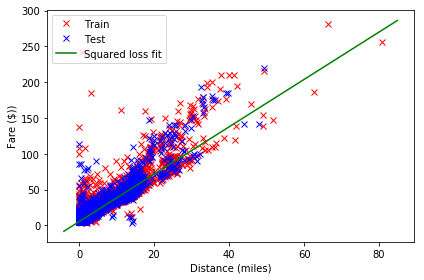

In [61]:
#Visualize
plt.plot(train_5["dist (miles)"], train_5["fare ($)"], 'rx')
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
plt.plot(test_5["dist (miles)"], test_5["fare ($)"], 'bx')
plt.plot(xlim, [theta1*xlim[0]+theta2, theta1*xlim[1]+theta2], 'g-')
plt.legend(["Train", "Test", "Squared loss fit"], loc="upper left")
plt.xlabel("Distance (miles)")
plt.ylabel("Fare ($))")
plt.tight_layout()

In [62]:
#Least Squared Error
LSE = sum((test_5["fare ($)"]-(theta1*test_5["dist (miles)"]+theta2))**2)/test.num_rows
LSE

26.690733155169941

In [63]:
#Method 2: K Nearest Neighbors
def distance(x, y):
    return np.sqrt(np.sum((x-y)**2,1))

def predict_fare(input_table, to_predict, k, averaging=True):
    input_data = input_table.select('dist (miles)').values
    dists = distance(to_predict, input_data)
    inds = np.argsort(dists)[0:k]
    if averaging:
        most_common_response = np.mean(input_table['fare ($)'][inds])
    else:
        most_common_response = np.argmax(np.bincount(list(input_table['fare ($)'][inds])))    
    return most_common_response

test_5['predicted_k1'] = test_5.apply(lambda dist: predict_fare(train_5, dist, 1, True),'dist (miles)')
test_5['predicted_k5'] = test_5.apply(lambda dist: predict_fare(train_5, dist, 5, True),'dist (miles)')
test_5['predicted_k10'] = test_5.apply(lambda dist: predict_fare(train_5, dist, 10, True),'dist (miles)')

#Least Squared Error
LSE_k1 = sum((test_5["fare ($)"]-test_5["predicted_k1"])**2)/test_5.num_rows
LSE_k5 = sum((test_5["fare ($)"]-test_5["predicted_k5"])**2)/test_5.num_rows
LSE_k10 = sum((test_5["fare ($)"]-test_5["predicted_k10"])**2)/test_5.num_rows

LSE_k1, LSE_k5, LSE_k10

(36.873386604130744, 25.377421029869186, 24.201884571052386)

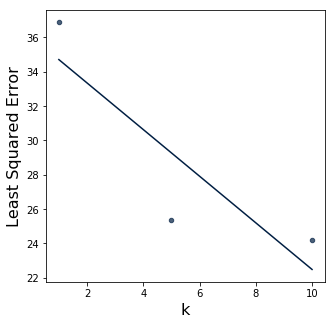

In [64]:
#Visualize
k_error = Table().with_columns("k", [1, 5, 10], "Least Squared Error", [LSE_k1, LSE_k5, LSE_k10])
k_error.select("k", "Least Squared Error").scatter("k", fit_line=True)